# validating bleu

In [36]:
predicts = []
with open('eval/OOVSUB-20kword/5_77342_predict',encoding='utf-8') as fhdl:
    for line in fhdl:
        linesp = line.strip().split(' ')
        sentence = []
        for word in linesp:
            if word == '<eos>':
                break
            sentence.append(word)
        sentence = ''.join(sentence)
        predicts.append(sentence)

In [37]:
targets = []
with open('eval/OOVSUB-20kword/5_77342_target',encoding='utf-8') as fhdl:
    for line in fhdl:
        linesp = line.strip().split(' ')
        sentence = []
        for word in linesp:
            if word == '<eos>':
                break
            sentence.append(word)
        sentence = ''.join(sentence)
        targets.append(sentence)

In [38]:
import nltk
def get_bleu_score(predict,target):
    target = [[[j for index,j in enumerate(i)]] for i in target]
    predict = [[j for index,j in enumerate(i)] for i in predict]
    BLEUscore = nltk.translate.bleu_score.corpus_bleu(target,predict)
    return BLEUscore

In [39]:
predicts_tmp,targets_tmp  = [],[]
for i ,j in zip(predicts,targets):
    if len(i) >= 4 and len(j) > 4:
        predicts_tmp.append(i)
        targets_tmp.append(j)

In [40]:
get_bleu_score(predicts_tmp,targets_tmp)

0.24325742931395575

# tensorboard of my own

In [48]:
train_prefix = 'val/OOVSUB_6layer/'

In [49]:
import os
train_loss_file = os.path.join(train_prefix,'train_loss.txt')
test_loss_file = os.path.join(train_prefix,'test_loss.txt')

In [50]:
train_losses = []
train_steps = []

lossdic = {}

alpha = 0.999
exp_loss = None
max_epoch = 1
max_batch = 0
with open(train_loss_file) as fhdl:
    for line in fhdl:
        linesp = line.strip().split('\t')
        epoch,batch,loss = linesp
        epoch,batch,loss = int(epoch),int(batch),float(loss)
        max_epoch,max_batch = max(max_epoch,epoch),max(max_batch,batch)
        exp_loss = loss if exp_loss == None else alpha * exp_loss + (1 - alpha) * loss
        lossdic["{} {}".format(epoch,batch)] = exp_loss
        

In [51]:
max_epoch,max_batch

(2, 154686)

In [52]:
num = 0
losses = []
steps = []
for i in range(1,max_epoch + 1):
    for j in range(0,max_batch + 1):
        num += 1
        key = "{} {}".format(i,j)
        if key not in lossdic:
            break
        losses.append(lossdic[key])
        steps.append(num)

In [53]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [54]:
plt.style.use('ggplot')

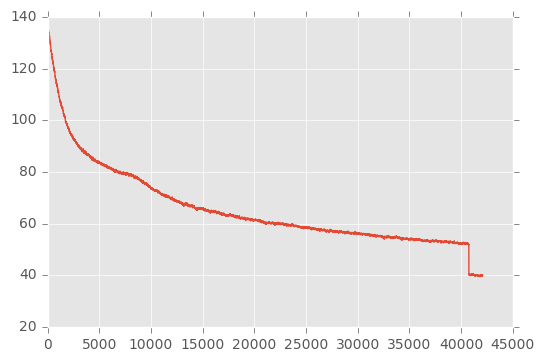

In [55]:
plt.plot(steps[:],losses[:])